# Data Preparation
Welcome to the Data Preparation. In this lesson we will be covering: 
- **Filling missing data**
- **Skewness**
- **Outliers** 
- **Datetime**

The lab for Lesson 6 will consist of all the exercises that you will find throughtout the notebook. 

For this lesson we will again be using the Titanic Survival Dataset from Kaggle. 

Let's review the column values once more as a reminder of the data we are using:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `?`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `?`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
- **Home.Dest**: Home / Destination

In [2]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Import titanic dataset
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [4]:
titanic_data['sex']= titanic_data['sex'].map(str)

# Filling Missing Data
Let's replace our missing values in the age column with the mean value.


In [5]:
# check for missing values
titanic_data.age.value_counts()

# modify pandas display options to view the full list
pd.options.display.max_rows = 4000

In [6]:
# is '?' concidered a null value?
titanic_data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [7]:
# replace ? with none
titanic_data = titanic_data.replace({'?': None})

# change the type fo the age column to numeric
titanic_data['age'] = pd.to_numeric(titanic_data['age'], errors = 'coerce')

# Lets round the age values
titanic_data['age'] = round(titanic_data['age'])

# lets check for null values again
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Using mean to fill in missing data

Let's replace missing age values with the average age of the people within the same gender

In [8]:
titanic_data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [9]:
# create a dictionary with the average age for each sex
gender_ages = dict(round(titanic_data.groupby('sex')['age'].mean()))
gender_ages

{'female': 29.0, 'male': 31.0}

In [10]:
gender_ages['male']

31.0

In [11]:
# create a column of the average ages
titanic_data['age_mean'] = titanic_data['sex'].apply(lambda x: gender_ages[x])

# replace all missing ages with the value in this column
titanic_data['age'].fillna(titanic_data['age_mean'], inplace=True)

# check the age column again
titanic_data['age'].value_counts()

31.0    208
29.0    108
24.0     49
22.0     44
18.0     42
30.0     42
21.0     41
28.0     35
25.0     34
36.0     33
26.0     31
27.0     30
19.0     29
32.0     28
23.0     26
20.0     24
35.0     23
45.0     21
40.0     21
33.0     21
39.0     20
17.0     20
16.0     19
1.0      19
42.0     18
34.0     18
50.0     15
38.0     15
48.0     14
47.0     14
2.0      12
41.0     11
14.0     10
9.0      10
54.0     10
44.0     10
4.0      10
43.0      9
49.0      9
37.0      9
55.0      8
51.0      8
46.0      8
60.0      8
3.0       7
52.0      6
15.0      6
6.0       6
8.0       6
58.0      6
61.0      5
56.0      5
62.0      5
64.0      5
57.0      5
5.0       5
13.0      5
12.0      4
10.0      4
7.0       4
53.0      4
63.0      4
11.0      4
59.0      3
70.0      3
0.0       3
65.0      3
71.0      2
67.0      1
80.0      1
66.0      1
74.0      1
76.0      1
Name: age, dtype: int64

In [12]:
# Exercise 1
# Think about ways to replace the missing values in the age column. 
# What other information can be used to replace the missing values.


# Skewed Data

Creating a histogram

Text(0, 0.5, 'No of records')

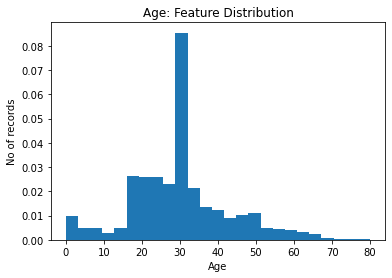

In [13]:
%matplotlib inline
# Create a histogram
plt.hist(titanic_data['age'], density=True, bins=25)
plt.title("Age: Feature Distribution")
plt.xlabel("Age")
plt.ylabel("No of records")


In [14]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch,age_mean
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.978610,0.498854,0.385027,30.288006
std,0.837836,0.486055,12.889776,1.041658,0.865560,0.957995
min,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,29.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,31.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,31.000000


Text(0, 0.5, 'No of records')

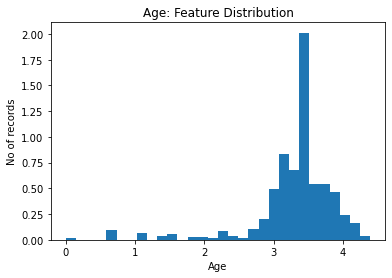

In [15]:
# Create a copy of our dataset
titanic_data_transformed = titanic_data.copy()

# applying the log transformation to the test data
titanic_data_transformed['age'] = titanic_data_transformed['age'].apply(lambda x: np.log(x+1))

# Visualize the new log distributions
plt.hist(titanic_data_transformed['age'], density=True, bins=30)
plt.title("Age: Feature Distribution")
plt.xlabel("Age")
plt.ylabel("No of records")


In [16]:
titanic_data_transformed.describe()

,pclass,survived,age,sibsp,parch,age_mean
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,3.306016,0.498854,0.385027,30.288006
std,0.837836,0.486055,0.605055,1.041658,0.865560,0.957995
min,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,2.000000,0.000000,3.135494,0.000000,0.000000,29.000000
50%,3.000000,0.000000,3.433987,0.000000,0.000000,31.000000
75%,3.000000,1.000000,3.583519,1.000000,0.000000,31.000000
max,3.000000,1.000000,4.394449,8.000000,9.000000,31.000000


# Outliers

In [17]:
# calculate percentiles
age_percentiles = np.percentile(titanic_data['age'], [25, 50, 75])

# Print the result
print(age_percentiles)

[22. 30. 35.]


- if we split our data into buckets where we have the most common ages

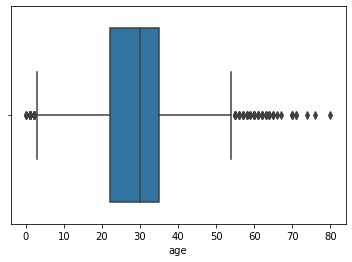

In [18]:
# import seaborn
import seaborn as sns


# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='age',data=titanic_data)


# Label the axes
_ = plt.xlabel('age')


# Show the plot
plt.show()

In [19]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch,age_mean
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.978610,0.498854,0.385027,30.288006
std,0.837836,0.486055,12.889776,1.041658,0.865560,0.957995
min,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,29.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,31.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,31.000000


In [20]:
# Remove outliers
df_no_outliers = titanic_data[titanic_data['age'] < 65]
df_no_outliers['age'].value_counts()

31.0    208
29.0    108
24.0     49
22.0     44
18.0     42
30.0     42
21.0     41
28.0     35
25.0     34
36.0     33
26.0     31
27.0     30
19.0     29
32.0     28
23.0     26
20.0     24
35.0     23
45.0     21
40.0     21
33.0     21
17.0     20
39.0     20
16.0     19
1.0      19
34.0     18
42.0     18
38.0     15
50.0     15
48.0     14
47.0     14
2.0      12
41.0     11
44.0     10
54.0     10
4.0      10
9.0      10
14.0     10
37.0      9
49.0      9
43.0      9
46.0      8
51.0      8
55.0      8
60.0      8
3.0       7
8.0       6
15.0      6
52.0      6
58.0      6
6.0       6
13.0      5
56.0      5
62.0      5
5.0       5
64.0      5
57.0      5
61.0      5
63.0      4
10.0      4
53.0      4
12.0      4
7.0       4
11.0      4
59.0      3
0.0       3
Name: age, dtype: int64

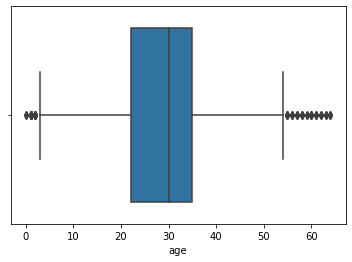

In [21]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='age',data=df_no_outliers)

# Label the axes
_ = plt.xlabel('age')


# Show the plot
plt.show()

In [22]:
# calculate new statistics
df_no_outliers.describe()

,pclass,survived,age,sibsp,parch,age_mean
count,1296.000000,1296.000000,1296.00000,1296.000000,1296.000000,1296.000000
mean,2.301698,0.384259,29.57716,0.501543,0.387346,30.282407
std,0.835060,0.486607,12.30357,1.045674,0.868831,0.959665
min,1.000000,0.000000,0.00000,0.000000,0.000000,29.000000
25%,2.000000,0.000000,22.00000,0.000000,0.000000,29.000000
50%,3.000000,0.000000,30.00000,0.000000,0.000000,31.000000
75%,3.000000,1.000000,35.00000,1.000000,0.000000,31.000000
max,3.000000,1.000000,64.00000,8.000000,9.000000,31.000000


In [23]:
# Exercise 2
# Remove the outliers from the 'fare' feature

## DateTime Manipulation

In [24]:
# Import datetime
import datetime as dt

# Import data with datetime (appointment data from a doctor's office)
date_df = pd.read_csv("datetime_data.csv")
date_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Note that date features like "AppointmentDay" and "ScheduledDay" seem to be "object" instead of date time.
- This is the case because  pandas is currently looking at these values as strings instead of dates.
- To convert these features into datetime we can simply use the pandas function to_datetime.

In [26]:
# Convert AppointmentDay into datetime
date_df['AppointmentDay'] = pd.to_datetime(date_df['AppointmentDay'])

# Convert AppointmentDay into datetime
date_df['ScheduledDay'] = pd.to_datetime(date_df['AppointmentDay'])

date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Now that you have these values with datetime type, you can use them to create a better analysis.
- datetime64 has several properties in pandas that we can now use 

link:https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties

In [27]:
# Create a new field that tells us the year in which each appointment was set
date_df['year_set'] = date_df['ScheduledDay'].dt.year

# Create a new field that tells us which day of the year the appointment was set
date_df['day_num'] = date_df['ScheduledDay'].dt.dayofyear

date_df.sort_values(by=['Age']).head(26)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year_set,day_num
99832,4.659432e+14,5775010,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,2016,158
34218,3.469431e+12,5649465,F,2016-05-09 00:00:00+00:00,2016-05-09 00:00:00+00:00,0,REDENÇÃO,0,0,0,0,0,0,Yes,2016,130
102834,4.882675e+10,5659726,F,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,0,MARUÍPE,0,0,0,0,0,1,No,2016,153
102832,9.726846e+12,5749887,F,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,0,MARUÍPE,0,0,0,0,0,0,No,2016,153
102830,2.845290e+13,5664173,M,2016-06-08 00:00:00+00:00,2016-06-08 00:00:00+00:00,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No,2016,160
49411,7.269995e+14,5650471,F,2016-05-03 00:00:00+00:00,2016-05-03 00:00:00+00:00,0,SANTOS DUMONT,0,0,0,0,0,0,No,2016,124
45406,5.757419e+12,5639154,M,2016-05-02 00:00:00+00:00,2016-05-02 00:00:00+00:00,0,SANTO ANDRÉ,0,0,0,0,0,0,No,2016,123
49413,4.454289e+13,5561032,F,2016-05-10 00:00:00+00:00,2016-05-10 00:00:00+00:00,0,SANTOS DUMONT,0,0,0,0,0,1,No,2016,131
102783,8.183869e+11,5769382,M,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,0,JOANA D´ARC,0,0,0,0,0,1,Yes,2016,158
102765,9.433852e+13,5776330,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,0,SANTA CECÍLIA,0,0,0,0,0,0,No,2016,158


In [28]:
# Exercise 3
# Find the week of the year corresponding to the 'ScheduleDay' feature
# (Hint: use the link above to find the method necessary to solve this exercise)